In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

df = pd.read_csv(r'C:\Users\alexa\Desktop\cs216finalproject\Allstatesinsurvey\all_deaths_clean.csv', encoding='unicode_escape')

Text(0.5, 1.0, 'Race Representation Compared to 2020 Census Demographics')

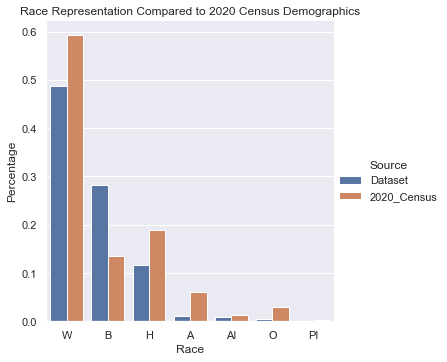

In [2]:
df_race = df.groupby("race").count().sort_values(by="id", ascending=False)["id"]
race_labels = df_race.index.values
prop_race_data = [x/len(df) for x in df_race]
prop_race_america = [.593, .136, .189, .061, .013, .029, .003]
df_race_percent = pd.DataFrame({"Race":race_labels, "Dataset":prop_race_data, "2020_Census":prop_race_america})
df_race_percent_melt = pd.melt(df_race_percent, id_vars = "Race", var_name = "Source", value_name = "Percentage")
sns.catplot(data = df_race_percent_melt, x = "Race", y = "Percentage", hue = "Source", kind = "bar")
plt.title("Race Representation Compared to 2020 Census Demographics")

This graph shows the relative percentages of each race represented in both the dataset and the 2020 American Census. Although most of the data reported is from before 2020, this census data was used as an overestimate of the percentage of minorities in the US because the demographics generally become more diverse as years go by. Percentages were used rather than raw counts to see if any races wer eover or underrepresented in the prison population as seen through the death reports. 

Text(0, 0.5, 'Percentage')

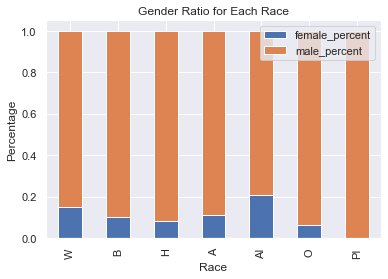

In [3]:
race_and_gender = df.pivot_table("id", index = "race", columns = "gender", aggfunc = "count")
df_gender_counts = pd.DataFrame({"female_counts":race_and_gender["f"], "male_counts":race_and_gender["m"]}).fillna(0).sort_values(by = "male_counts", ascending = False)
df_gender_counts["male_percent"] = df_gender_counts["male_counts"]/(df_gender_counts["female_counts"] + df_gender_counts["male_counts"])
df_gender_counts["female_percent"] = df_gender_counts["female_counts"]/(df_gender_counts["female_counts"] + df_gender_counts["male_counts"])
df_gender = df_gender_counts[["female_percent", "male_percent"]]
df_gender.plot(kind = "bar", stacked = True)
plt.title("Gender Ratio for Each Race")
plt.xlabel("Race")
plt.ylabel("Percentage")

This graph shows the ratio of female to male deaths for each race in the dataset. This graph is useful because it reveals more about the demographics of the dataset and reveals which races saw more female deaths relative to the total number of deaths reported. 

Text(0.5, 1.0, 'Death Counts Per Year')

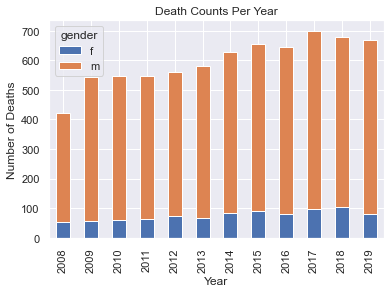

In [6]:
year_and_gender = df.pivot_table("id", index = "year", columns = "gender", aggfunc = "count")
year_and_gender.plot(kind = "bar", stacked = True)
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Death Counts Per Year")

This graph shows the number of death reports, colored by gender, for each year represented in the dataset. This graph helps visualize the increasing trend of death rate overall as well as the upward trends for both genders.